In [4]:
import pandas as pd
from datetime import datetime, timedelta
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Corn GDD class

In [5]:

def fahrenheit_to_celsius(temp_f):
    return (temp_f - 32) * 5/9

#Class for corn GDD 
class CornGDD:
    def __init__(self, daily_temp_df, time_column, min_temp_column, max_temp_column, celsius=True):
        self.daily_temp_df = daily_temp_df
        self.time_column = time_column
        self.min_temp_column = min_temp_column
        self.max_temp_column = max_temp_column
        self.celsius = celsius

        # Ensure the time column is of datetime type
        self.daily_temp_df[self.time_column] = pd.to_datetime(self.daily_temp_df[self.time_column])

        # Convert the temperature to Celsius if required
        if not self.celsius:
            self.daily_temp_df[self.min_temp_column] = self.daily_temp_df[self.min_temp_column].apply(fahrenheit_to_celsius)
            self.daily_temp_df[self.max_temp_column] = self.daily_temp_df[self.max_temp_column].apply(fahrenheit_to_celsius)
    
    def con_gdd(self, start_date, end_date):
        start_date = pd.Timestamp(start_date)
        end_date = pd.Timestamp(end_date)

        date_mask = (self.daily_temp_df[self.time_column] >= start_date) & (self.daily_temp_df[self.time_column] <= end_date)
        masked_data = self.daily_temp_df.loc[date_mask].copy()

        gdd_values = []
        cumulative_gdd = 0

        for index, row in masked_data.iterrows():
            min_temp = max(row[self.min_temp_column], 10 if self.celsius else 50)
            max_temp = max(min(row[self.max_temp_column], 30 if self.celsius else 86), min_temp)

            mean_temp = (min_temp + max_temp) / 2
            base_temp = 10 if self.celsius else 50
            gdd = max(mean_temp - base_temp, 0)

            gdd_values.append(gdd)
            cumulative_gdd += gdd

        masked_data['GDD'] = gdd_values
        masked_data['Cumulative_GDD'] = masked_data['GDD'].cumsum()

        return masked_data

In [6]:
#Read the datasets 
Wadena = pd.read_csv("Wadena_County_NOAA_nClimGrid.csv")
Cass = pd.read_csv("Cass_County_NOAA_nClimGrid.csv")
Crow_Wing = pd.read_csv("Crow_Wing_County_NOAA_nClimGrid.csv")
Todd = pd.read_csv("Todd_County_NOAA_nClimGrid.csv")
Morrison = pd.read_csv("Morrison_County_NOAA_nClimGrid.csv")
Douglas = pd.read_csv("Douglas_County_NOAA_nClimGrid.csv")
Otter_Tail = pd.read_csv("Otter_Tail_County_NOAA_nClimGrid.csv")
Pope = pd.read_csv("Pope_County_NOAA_nClimGrid.csv")
Stearns = pd.read_csv("Stearns_County_NOAA_nClimGrid.csv")
Sherburne = pd.read_csv("Sherburne_County_NOAA_nClimGrid.csv")
Benton = pd.read_csv("Benton_County_NOAA_nClimGrid.csv")
Becker = pd.read_csv("Becker_County_NOAA_nClimGrid.csv")
Hubbard= pd.read_csv("Hubbard_County_NOAA_nClimGrid.csv")
Kandiyohi= pd.read_csv("Kandiyohi_County_NOAA_nClimGrid.csv")

## calculate GDD each year each county keeping 4-15 as planting date

In [7]:
# Function to convert Celsius to Fahrenheit for GDD
def celsius_to_fahrenheit(c):
    return (c * 9/5)
"""
https://www.linkedin.com/pulse/unit-transformation-degree-days-between-celsius-fahrenheit-yin/
"""
# Dictionary of county DataFrames
county_dfs = {
    "Wadena": Wadena,
    "Cass": Cass,
    "Crow_Wing": Crow_Wing,
    "Todd": Todd,
    "Morrison": Morrison,
    "Douglas": Douglas,
    "Otter_Tail": Otter_Tail,
    "Pope": Pope,
    "Stearns": Stearns,
    "Sherburne": Sherburne,
    "Benton": Benton,
    "Becker": Becker,
    "Hubbard": Hubbard,
    "Kandiyohi": Kandiyohi
}

# Loop through each county
for county_name, df in county_dfs.items():
    df['time'] = pd.to_datetime(df['time'])
    all_years = []

    for year in range(1951, 2025):
        corn = CornGDD(df, 'time', 'tmin', 'tmax')  # Output in Celsius
        start = pd.to_datetime(f"{year}-04-15").date()
        end = pd.to_datetime(f"{year}-12-31").date()

        gdd_df = corn.con_gdd(start, end)
        gdd_df['Year'] = year

        # Manually convert GDD to Fahrenheit
        gdd_df['GDD'] = gdd_df['GDD'].apply(celsius_to_fahrenheit)
        gdd_df['Cumulative_GDD'] = gdd_df['GDD'].cumsum()

        all_years.append(gdd_df)

    historical_df = pd.concat(all_years, ignore_index=True)
    historical_df.to_csv(f"{county_name}_growing2024_Corn_GDD_1951_2024.csv", index=False)
    print(f"Saved: {county_name}_growing2024_Corn_GDD_1951_2024.csv")

Saved: Wadena_growing2024_Corn_GDD_1951_2024.csv
Saved: Cass_growing2024_Corn_GDD_1951_2024.csv
Saved: Crow_Wing_growing2024_Corn_GDD_1951_2024.csv
Saved: Todd_growing2024_Corn_GDD_1951_2024.csv
Saved: Morrison_growing2024_Corn_GDD_1951_2024.csv
Saved: Douglas_growing2024_Corn_GDD_1951_2024.csv
Saved: Otter_Tail_growing2024_Corn_GDD_1951_2024.csv
Saved: Pope_growing2024_Corn_GDD_1951_2024.csv
Saved: Stearns_growing2024_Corn_GDD_1951_2024.csv
Saved: Sherburne_growing2024_Corn_GDD_1951_2024.csv
Saved: Benton_growing2024_Corn_GDD_1951_2024.csv
Saved: Becker_growing2024_Corn_GDD_1951_2024.csv
Saved: Hubbard_growing2024_Corn_GDD_1951_2024.csv
Saved: Kandiyohi_growing2024_Corn_GDD_1951_2024.csv


# Simulating 4-15 to 6-15 planting dates. Here we are recalculating each planting dates from 4-15 to 6-15 for each year each county from 1951 to 2024

In [8]:
# Function to convert Celsius to Fahrenheit for GDD
def celsius_to_fahrenheit(c):
    return (c * 9/5)
"""
https://www.linkedin.com/pulse/unit-transformation-degree-days-between-celsius-fahrenheit-yin/
"""


# Output folder path
output_folder = "Corn_Simulated AllCounties_GDD_1951_2024"
os.makedirs(output_folder, exist_ok=True)

# Dictionary of county GDD data
county_dfs = {
    "Wadena": Wadena,
    "Cass": Cass,
    "Crow_Wing": Crow_Wing,
    "Todd": Todd,
    "Morrison": Morrison,
    "Douglas": Douglas,
    "Otter_Tail": Otter_Tail,
    "Pope": Pope,
    "Stearns": Stearns,
    "Sherburne": Sherburne,
    "Benton": Benton,
    "Becker": Becker,
    "Hubbard": Hubbard,
    "Kandiyohi": Kandiyohi
}

# Loop through each county and year
for county_name, df in county_dfs.items():
    df['time'] = pd.to_datetime(df['time'])

    all_planting_results = []
    for year in range(1951, 2025):
        corn = CornGDD(df, 'time', 'tmin', 'tmax') 
        start_year = pd.to_datetime(f"{year}-04-15")
        end_year = pd.to_datetime(f"{year}-12-31")
        full_gdd_df = corn.con_gdd(start_year.date(), end_year.date())
        full_gdd_df['time'] = pd.to_datetime(full_gdd_df['time'])
        full_gdd_df['GDD'] = celsius_to_fahrenheit(full_gdd_df['GDD'])

        planting_dates = pd.date_range(f"{year}-04-15",f"{year}-06-15", freq = 'D')

        for planting_date in planting_dates:
            sub_df = full_gdd_df[full_gdd_df['time'] >= planting_date].copy()
            sub_df['Year'] = year
            sub_df['Planting Date'] = planting_date.date()
            sub_df['DAP'] = (sub_df['time'] - planting_date).dt.days
            sub_df['Cumulative_GDD'] = sub_df['GDD'].cumsum()
            all_planting_results.append(sub_df)

    historical_df = pd.concat(all_planting_results, ignore_index=True)
    output_path = os.path.join(output_folder, f"{county_name}_AllPlantingDates_Corn_GDD_1951_2024.csv")
    historical_df.to_csv(output_path, index=False)
    print(f"Saved: {output_path}")

Saved: Corn_Simulated AllCounties_GDD_1951_2024/Wadena_AllPlantingDates_Corn_GDD_1951_2024.csv
Saved: Corn_Simulated AllCounties_GDD_1951_2024/Cass_AllPlantingDates_Corn_GDD_1951_2024.csv
Saved: Corn_Simulated AllCounties_GDD_1951_2024/Crow_Wing_AllPlantingDates_Corn_GDD_1951_2024.csv
Saved: Corn_Simulated AllCounties_GDD_1951_2024/Todd_AllPlantingDates_Corn_GDD_1951_2024.csv
Saved: Corn_Simulated AllCounties_GDD_1951_2024/Morrison_AllPlantingDates_Corn_GDD_1951_2024.csv
Saved: Corn_Simulated AllCounties_GDD_1951_2024/Douglas_AllPlantingDates_Corn_GDD_1951_2024.csv
Saved: Corn_Simulated AllCounties_GDD_1951_2024/Otter_Tail_AllPlantingDates_Corn_GDD_1951_2024.csv
Saved: Corn_Simulated AllCounties_GDD_1951_2024/Pope_AllPlantingDates_Corn_GDD_1951_2024.csv
Saved: Corn_Simulated AllCounties_GDD_1951_2024/Stearns_AllPlantingDates_Corn_GDD_1951_2024.csv
Saved: Corn_Simulated AllCounties_GDD_1951_2024/Sherburne_AllPlantingDates_Corn_GDD_1951_2024.csv
Saved: Corn_Simulated AllCounties_GDD_1951

###  Keeping Becker "Becker 2024 corn Growth staging.csv" 2024 data growth stages as threshold for each year each county.
#### We are cleaning the data and getting mode for becker and then using that as a threshold

In [9]:
import pandas as pd
import os

# All counties
counties = [
    "Wadena", "Cass", "Crow_Wing", "Todd", "Morrison", "Douglas",
    "Otter_Tail", "Pope", "Stearns", "Sherburne", "Benton",
    "Hubbard", "Kandiyohi"
]
output_folder = "AllCounties_CornGrowthStages_1951_2022_withBeckerRef"
os.makedirs(output_folder, exist_ok=True)

#Step 1: Load Becker 2024 thresholds for corn
becker = pd.read_csv("Becker 2024 corn Growth staging.csv") 
becker.columns = becker.columns.str.strip()
becker["Date"] = pd.to_datetime(becker["Date"] + "-2024", format="%d-%b-%Y", errors="coerce")

# Set reference planting date which is May 1 for Becker
planting_date_2024 = pd.Timestamp("2024-05-01")

# Define ordered corn stages and getting DAP for Becker
ordered_stages = [
    'VE', 'V2', 'V4', 'V6', 'V8','V10', 'VT','R1', 'R2', 'R3', 'R4', 'R5', 'R6'
]
becker_stage_data = becker[["Growth Stage", "Date", "AGDD"]].dropna()
becker_stage_data["Becker DAP"] = (becker_stage_data["Date"] - planting_date_2024).dt.days
becker_thresholds = (
    becker_stage_data
    .drop_duplicates("Growth Stage")[["Growth Stage", "AGDD", "Becker DAP"]]
    .rename(columns={"Growth Stage": "Stage", "AGDD": "Becker AGDD"})
)
becker_thresholds = becker_thresholds[becker_thresholds["Stage"].isin(ordered_stages)].reset_index(drop=True)

# Step 2: Process Each County 
for county in counties:
    input_file = f"Corn_Simulated AllCounties_GDD_1951_2024/{county}_AllPlantingDates_Corn_GDD_1951_2024.csv"  
    if not os.path.exists(input_file):
        print(f"File not found: {input_file}")
        continue

    df = pd.read_csv(input_file)
    df["time"] = pd.to_datetime(df["time"])
    df["Planting Date"] = pd.to_datetime(df["Planting Date"])
    df = df[df["Year"].between(1951, 2025)].copy()

    results = []
    for (year, planting), group in df.groupby(["Year", "Planting Date"]):
        group = group[group["time"] >= planting].sort_values("time").copy()
        group["Cumulative_GDD"] = group["GDD"].cumsum()

        for _, row in becker_thresholds.iterrows():
            stage = row["Stage"]
            becker_agdd = row["Becker AGDD"]
            becker_dap = row["Becker DAP"]

            met = group[group["Cumulative_GDD"] >= becker_agdd]
            if not met.empty:
                first_hit = met.iloc[0]
                dap_reached = (first_hit["time"] - planting).days
                agdd_reached = round(first_hit["Cumulative_GDD"], 1)
                results.append({
                    "Crop": "Corn",
                    "County": county,
                    "Year": year,
                    "Planting Date": planting.date(),
                    "Stage": stage,
                    "Becker DAP": becker_dap,
                    "DAP Reached": dap_reached,
                    "Δ DAP": dap_reached - becker_dap,
                    "Becker AGDD (°F)": round(becker_agdd, 2),
                    "AGDD Reached (°F)": agdd_reached,
                    "Delta AGDD (Compared to Becker)": round(agdd_reached - becker_agdd, 1)
                })
            else:
                results.append({
                    "Crop": "Corn",
                    "County": county,
                    "Year": year,
                    "Planting Date": planting.date(),
                    "Stage": stage,
                    "Becker DAP": becker_dap,
                    "DAP Reached": "",
                    "Δ DAP": "",
                    "Becker AGDD (°F)": round(becker_agdd, 2),
                    "AGDD Reached (°F)": "",
                    "Delta AGDD (Compared to Becker)": ""
                })

    out_df = pd.DataFrame(results)
    out_path = f"{output_folder}/{county}_Corn_GrowthStages_1951_2022_with_BeckerReference.csv"
    out_df.to_csv(out_path, index=False)
    print(f"Saved: {out_path}")


Saved: AllCounties_CornGrowthStages_1951_2022_withBeckerRef/Wadena_Corn_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_CornGrowthStages_1951_2022_withBeckerRef/Cass_Corn_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_CornGrowthStages_1951_2022_withBeckerRef/Crow_Wing_Corn_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_CornGrowthStages_1951_2022_withBeckerRef/Todd_Corn_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_CornGrowthStages_1951_2022_withBeckerRef/Morrison_Corn_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_CornGrowthStages_1951_2022_withBeckerRef/Douglas_Corn_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_CornGrowthStages_1951_2022_withBeckerRef/Otter_Tail_Corn_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_CornGrowthStages_1951_2022_withBeckerRef/Pope_Corn_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_CornGrowthStages_

In [10]:
import pandas as pd
import os
import glob

# Set the folder containing your corn CSV files
input_folder = "AllCounties_CornGrowthStages_1951_2022_withBeckerRef"
output_file = "AllCounties_CornGrowthStages_1951_2022_withBeckerRef_combined.csv"

# Get a list of all CSV files in the folder
csv_files = glob.glob(os.path.join(input_folder, "*.csv"))

# Combine all CSV files into one DataFrame
combined_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv(output_file, index=False)

print(f"Combined CSV saved as: {output_file}")


Combined CSV saved as: AllCounties_CornGrowthStages_1951_2022_withBeckerRef_combined.csv


In [11]:
import pandas as pd

# Load the data
df = pd.read_csv("AllCounties_CornGrowthStages_1951_2022_withBeckerRef_combined.csv")

# Filter for V8, R1, and R3 stages
df_filtered = df[df["Stage"].isin(["V8", "R1", "R3"])]

# Pivot to get DAP values for each stage
dap_pivot = df_filtered.pivot_table(
    index=["Year", "County", "Planting Date"],
    columns="Stage",
    values="DAP Reached"
).reset_index()

# Drop rows with missing V8, R1, or R3 values
dap_pivot = dap_pivot.dropna(subset=["V8", "R1", "R3"])

# Calculate durations
dap_pivot["V8_to_R1_Duration"] = dap_pivot["R1"] - dap_pivot["V8"]
dap_pivot["V8_to_R3_Duration"] = dap_pivot["R3"] - dap_pivot["V8"]

# Select relevant columns
output_df = dap_pivot[["Year", "County", "Planting Date", "V8_to_R1_Duration", "V8_to_R3_Duration"]]

# Save to CSV
#output_df.to_csv("Corn_V8_to_R1_and_R3_Duration_By_County_and_PlantingDate.csv", index=False)

#print("CSV file 'Corn_V8_to_R1_and_R3_Duration_By_County_and_PlantingDate.csv' created successfully.")



### checking the dataframe

In [12]:
diff = df[df.Stage=='R1']['DAP Reached'].values-df[df.Stage=='VT']['DAP Reached'].values
sub_df = pd.DataFrame({'Year': df[df.Stage=='R1'].Year.values,
                      'County': df[df.Stage=='R1'].County.values,
                      'Diff': diff})
sub_df

,Year,County,Diff
0,1951,Benton,7.0
1,1951,Benton,7.0
2,1951,Benton,7.0
3,1951,Benton,7.0
4,1951,Benton,7.0
...,...,...,...
59639,2024,Wadena,7.0
59640,2024,Wadena,6.0
59641,2024,Wadena,7.0
59642,2024,Wadena,8.0


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


<AxesSubplot:xlabel='County', ylabel='Diff'>

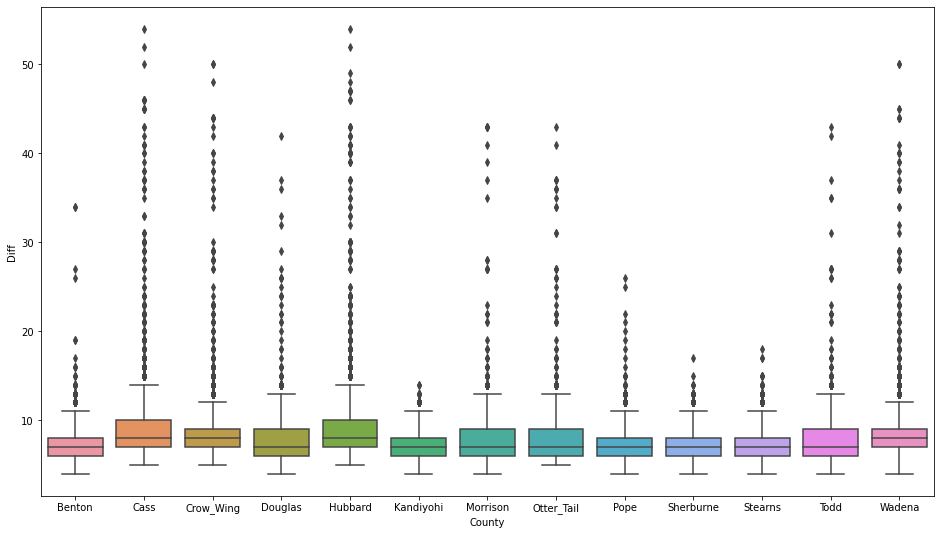

In [14]:
fig, ax = plt.subplots(1,1,figsize=(16,9))
sns.boxplot(data=sub_df, x='County', y='Diff', ax=ax)

<AxesSubplot:xlabel='Year', ylabel='Diff'>

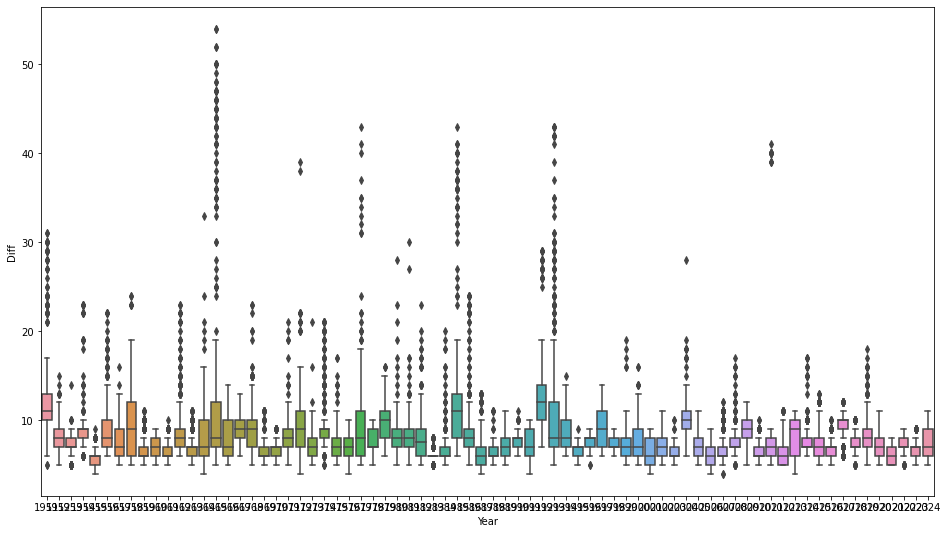

In [15]:
fig, ax = plt.subplots(1,1,figsize=(16,9))
sns.boxplot(data=sub_df, x='Year', y='Diff', ax=ax)

## Start Visualization of the datasets

In [16]:
import pandas as pd

# Load growth stage data and NOAA daily weather
df = pd.read_csv("AllCounties_CornGrowthStages_1951_2022_withBeckerRef_combined.csv")
# Preprocessing
df["Planting Date"] = pd.to_datetime(df["Planting Date"], errors="coerce")
df["Stage Date"] = df["Planting Date"] + pd.to_timedelta(df["DAP Reached"], unit="D")

# Filter for VT and R1 stages
df_filtered = df[df["Stage"].isin(["VT", "R1"])]
dap_pivot = df_filtered.pivot_table(index=["Year", "County", "Planting Date"], columns="Stage", values="DAP Reached").reset_index()
dap_pivot = dap_pivot.dropna(subset=["VT", "R1"])
dap_pivot["VT_to_R1_Duration"] = dap_pivot["R1"] - dap_pivot["VT"]

# Initialize an empty list to collect cleaned yearly data
cleaned = []

# Loop over each year, apply IQR filtering
for year, group in dap_pivot.groupby("Year"):
    q1 = group["VT_to_R1_Duration"].quantile(0.25)
    q3 = group["VT_to_R1_Duration"].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    # Filter rows within year-specific IQR range
    filtered = group[
        (group["VT_to_R1_Duration"] >= lower) & 
        (group["VT_to_R1_Duration"] <= upper)
    ]
    
    cleaned.append(filtered)

# Combine all into clean_dap
clean_dap = pd.concat(cleaned, ignore_index=True)

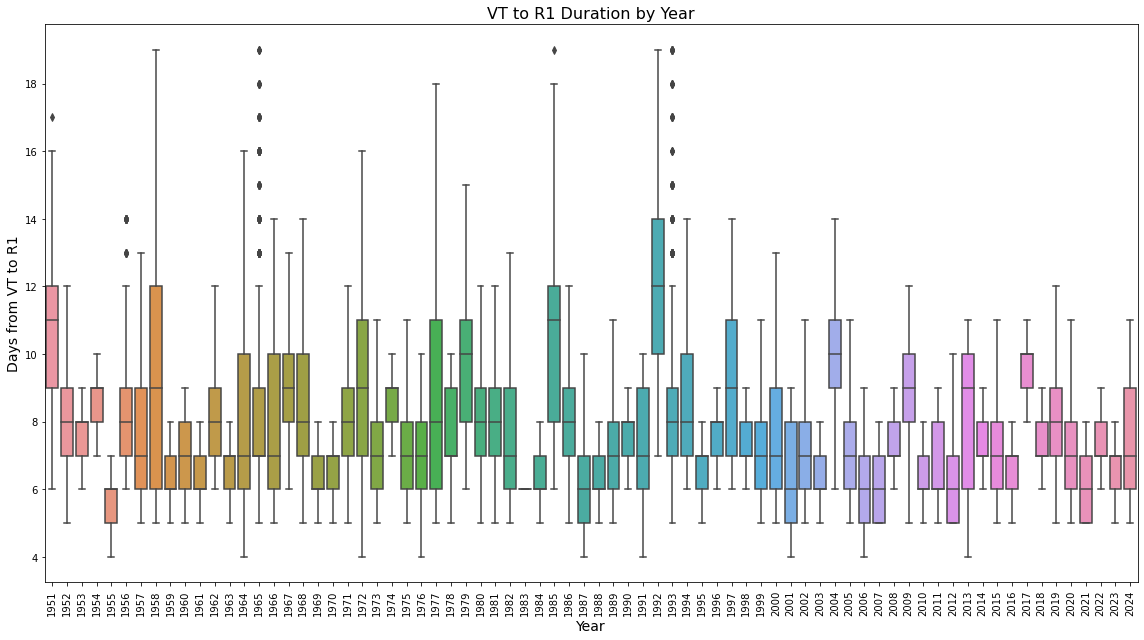

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot VT to R1 duration per year from clean_dap
plt.figure(figsize=(16, 9))
sns.boxplot(data=clean_dap, x="Year", y="VT_to_R1_Duration")
plt.title("VT to R1 Duration by Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Days from VT to R1", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [18]:
noaa = pd.read_csv("Combined_NOAA_nClimGrid_AllCounties.csv")

In [19]:
import pandas as pd
noaa = pd.read_csv("Combined_NOAA_nClimGrid_AllCounties.csv")
# Ensure datetime format for NOAA time column
noaa["time"] = pd.to_datetime(noaa["time"], errors="coerce")

# Optional: speed up filtering by indexing
noaa = noaa.sort_values("time")  # Important for time-based filtering
noaa.set_index("time", inplace=True)  # Faster date slicing

# Store results
precip_data = []

# Group NOAA by County once to avoid repeatedly filtering whole dataframe
noaa_by_county = dict(tuple(noaa.groupby("County")))

# Loop through each record in clean_dap
for _, row in clean_dap.iterrows():
    county = row["County"]
    year = row["Year"]
    vt_date = row["Planting Date"] + pd.to_timedelta(row["VT"], unit="D")
    r1_date = row["Planting Date"] + pd.to_timedelta(row["R1"], unit="D")

    # Get weather data for that county (faster lookup)
    if county not in noaa_by_county:
        continue  # skip if county not in NOAA data

    county_weather = noaa_by_county[county]

    # Slice by date range using datetime index
    date_filtered = county_weather.loc[vt_date:r1_date]

    total_precip = date_filtered["prcp"].sum()

    precip_data.append({
        "Year": year,
        "County": county,
        "Planting Date": row["Planting Date"],
        "VT_Date": vt_date,
        "R1_Date": r1_date,
        "Precipitation (mm)": total_precip
    })

# Create final DataFrame
precip_df = pd.DataFrame(precip_data)


In [20]:
precip_df

,Year,County,Planting Date,VT_Date,R1_Date,Precipitation (mm)
0,1951,Benton,1951-04-15,1951-07-29,1951-08-05,31.236288
1,1951,Benton,1951-04-16,1951-07-29,1951-08-05,31.236288
2,1951,Benton,1951-04-17,1951-07-29,1951-08-05,31.236288
3,1951,Benton,1951-04-18,1951-07-29,1951-08-05,31.236288
4,1951,Benton,1951-04-19,1951-07-29,1951-08-05,31.236288
...,...,...,...,...,...,...
48447,2024,Wadena,2024-06-11,2024-08-24,2024-08-31,9.427628
48448,2024,Wadena,2024-06-12,2024-08-25,2024-08-31,9.427628
48449,2024,Wadena,2024-06-13,2024-08-25,2024-09-01,9.427628
48450,2024,Wadena,2024-06-14,2024-08-26,2024-09-03,9.427628


In [21]:
# Define planting window (May 1 – May 10 of each year)
planting_start = pd.to_datetime("05-01", format="%m-%d")
planting_end   = pd.to_datetime("05-10", format="%m-%d")

precip_data = []

for _, row in clean_dap.iterrows():
    county = str(row["County"]).strip()
    year = row["Year"]
    planting_date = row["Planting Date"]

    # Skip if planting date is missing
    if pd.isna(planting_date):
        continue

    # Filter planting dates within May 1–May 10 window
    if not (planting_start.replace(year=year) <= planting_date <= planting_end.replace(year=year)):
        continue

    # Compute VT/R1 dates
    vt_date = planting_date + pd.to_timedelta(row["VT"], unit="D")
    r1_date = planting_date + pd.to_timedelta(row["R1"], unit="D")

    if pd.isna(vt_date) or pd.isna(r1_date):
        continue

    start, end = (vt_date, r1_date) if vt_date <= r1_date else (r1_date, vt_date)

    county_weather = noaa_by_county.get(county)
    if county_weather is None:
        continue

    date_filtered = county_weather.loc[start:end]
    total_precip = date_filtered["prcp"].sum(skipna=True)

    precip_data.append({
        "Year": year,
        "County": county,
        "Planting Date": planting_date,
        "VT_Date": vt_date,
        "R1_Date": r1_date,
        "Precipitation (mm)": total_precip
    })

precip_df_plantingwindow = pd.DataFrame(precip_data)

In [22]:
precip_df_plantingwindow

,Year,County,Planting Date,VT_Date,R1_Date,Precipitation (mm)
0,1951,Benton,1951-05-01,1951-08-01,1951-08-09,28.774713
1,1951,Benton,1951-05-02,1951-08-02,1951-08-10,35.509487
2,1951,Benton,1951-05-03,1951-08-02,1951-08-11,35.509487
3,1951,Benton,1951-05-04,1951-08-03,1951-08-13,45.018893
4,1951,Benton,1951-05-05,1951-08-03,1951-08-13,45.018893
...,...,...,...,...,...,...
8076,2024,Wadena,2024-05-06,2024-08-01,2024-08-09,41.214631
8077,2024,Wadena,2024-05-07,2024-08-01,2024-08-10,41.214631
8078,2024,Wadena,2024-05-08,2024-08-02,2024-08-11,31.946733
8079,2024,Wadena,2024-05-09,2024-08-02,2024-08-12,31.946733


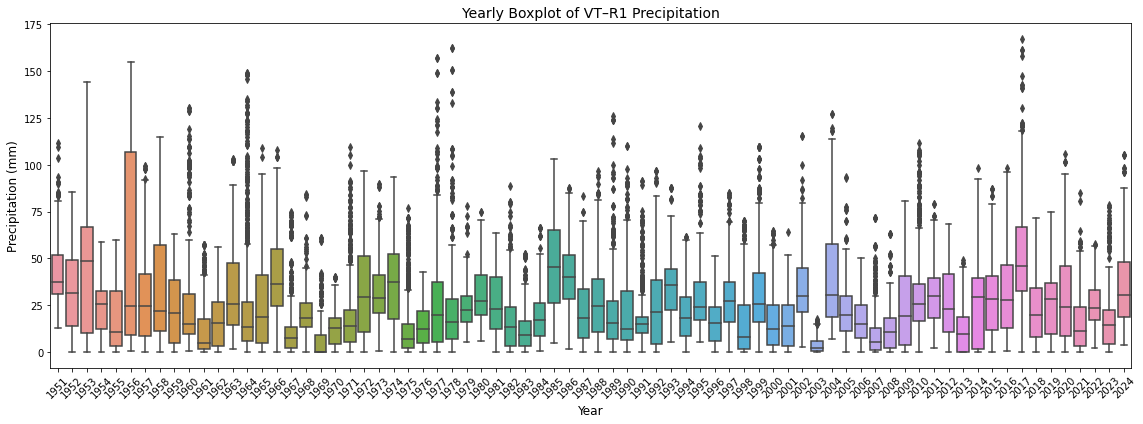

In [23]:
# Create the boxplot
plt.figure(figsize=(16, 6))
sns.boxplot(data=precip_df, x="Year", y="Precipitation (mm)")

# Customize the plot
plt.title("Yearly Boxplot of VT–R1 Precipitation", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Precipitation (mm)", fontsize=12)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


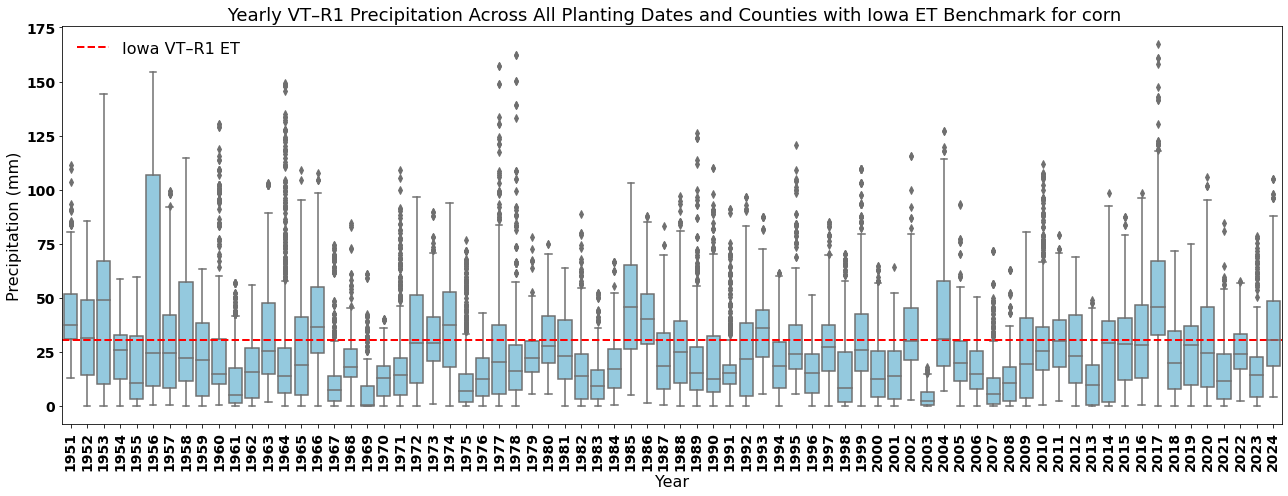

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Iowa ET benchmark in mm
et_iowa_mm = 30.48

# Create the boxplot
plt.figure(figsize=(18, 7))
sns.boxplot(data=precip_df, x="Year", y="Precipitation (mm)", color = "skyblue")

# Add Iowa ET benchmark line
plt.axhline(et_iowa_mm, color='red', linestyle='--', linewidth=2, label='Iowa VT–R1 ET')

# Customize the plot
plt.title(" Yearly VT–R1 Precipitation Across All Planting Dates and Counties with Iowa ET Benchmark for corn", fontsize=18)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Precipitation (mm)", fontsize=16,)
# Tick labels as you provided
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

# Legend with larger font
plt.legend(loc="upper left", fontsize=16, frameon=False)
# Display the plot
plt.tight_layout()
# Save at 300 dpi for publication
plt.tight_layout()
plt.savefig(
    "Corn_Simulated AllCounties_GDD_1951_2024/vt_r1_precip_boxplot.png",
    dpi=300, bbox_inches='tight'
)

plt.show()


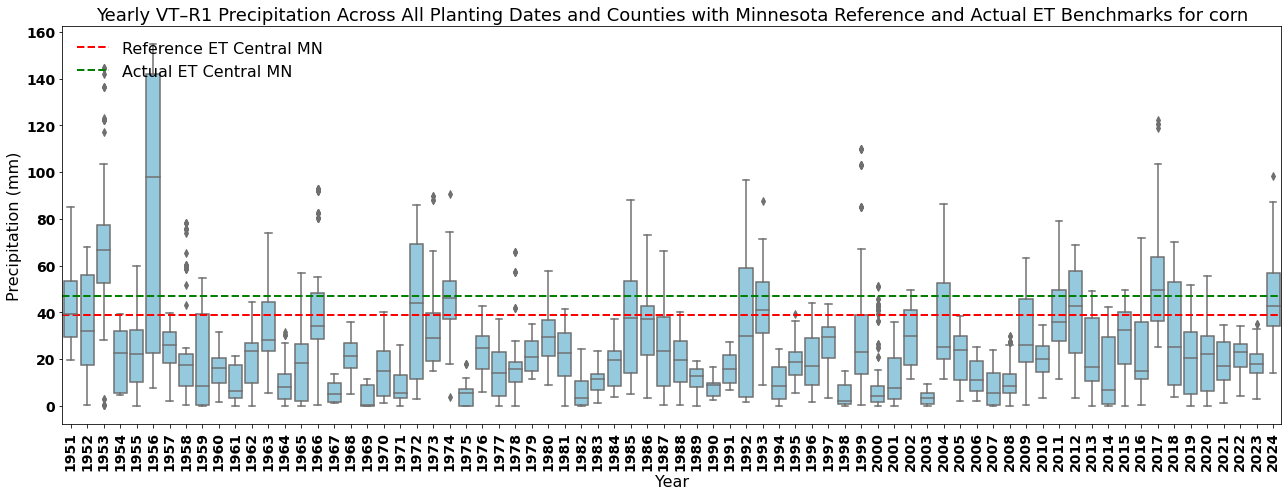

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reference ET (Central Minnesota benchmark, mm)
ref_et_Central_MN_mm = 39.02   # average ET
# Actual ET (scaled by 1.2 KC FAO)
actual_et_Central_MN_mm = 1.20 * ref_et_Central_MN_mm

# Create the boxplot
plt.figure(figsize=(18, 7))
sns.boxplot(data=precip_df_plantingwindow, x="Year", y="Precipitation (mm)", color="skyblue")

# Add benchmark line (reference ET)
plt.axhline(ref_et_Central_MN_mm, color='red', linestyle='--', linewidth=2, 
            label=f'Reference ET Central MN')

# Add actual ET line
plt.axhline(actual_et_Central_MN_mm, color='green', linestyle='--', linewidth=2, 
            label=f'Actual ET Central MN')

# Customize the plot
plt.title("Yearly VT–R1 Precipitation Across All Planting Dates and Counties with Minnesota Reference and Actual ET Benchmarks for corn", fontsize=18)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Precipitation (mm)", fontsize=16)

# Tick labels
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

# Legend with larger font
plt.legend(loc="upper left", fontsize=16, frameon=False)

# Save at 300 dpi for publication
plt.tight_layout()
plt.savefig(
    "Corn_Simulated AllCounties_GDD_1951_2024/vt_r1_precip_boxplot_Minnesota.png",
    dpi=300, bbox_inches='tight'
)

plt.show()


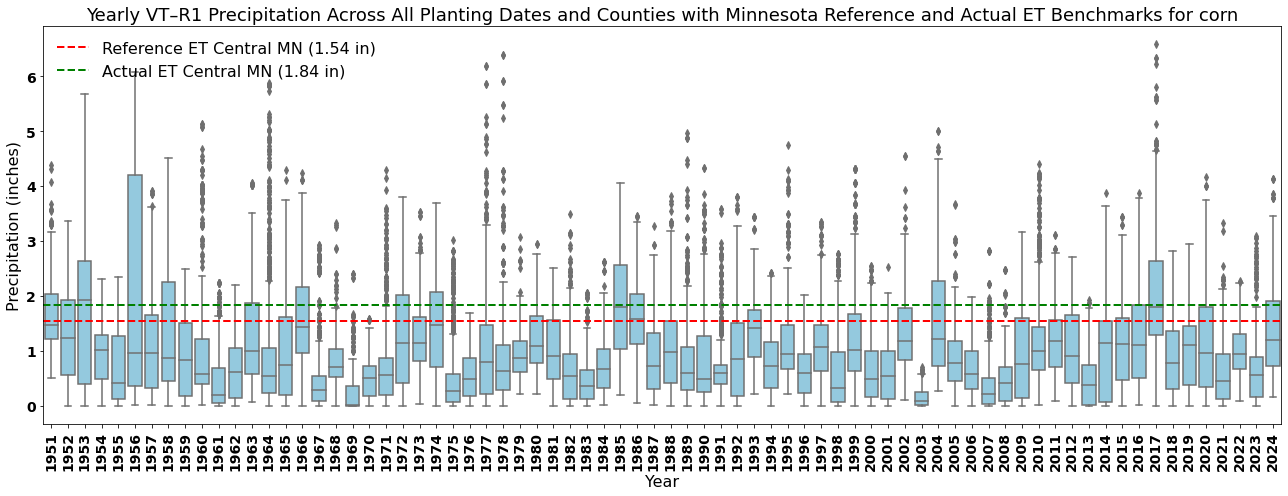

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conversion factor
mm_to_inch = 1 / 25.4

# Reference ET (Central Minnesota benchmark, mm → inches)
ref_et_Central_MN_in = 39.02 * mm_to_inch   # average ET in inches
# Actual ET (scaled by 1.2 KC FAO → inches)
actual_et_Central_MN_in = (1.20 * 39.02) * mm_to_inch

# Create a new column in inches
precip_df["Precipitation (in)"] = precip_df["Precipitation (mm)"] * mm_to_inch

# Create the boxplot
plt.figure(figsize=(18, 7))
sns.boxplot(data=precip_df, x="Year", y="Precipitation (in)", color="skyblue")

# Add benchmark line (reference ET)
plt.axhline(ref_et_Central_MN_in, color='red', linestyle='--', linewidth=2, 
            label=f'Reference ET Central MN ({ref_et_Central_MN_in:.2f} in)')

# Add actual ET line
plt.axhline(actual_et_Central_MN_in, color='green', linestyle='--', linewidth=2, 
            label=f'Actual ET Central MN ({actual_et_Central_MN_in:.2f} in)')

# Customize the plot
plt.title("Yearly VT–R1 Precipitation Across All Planting Dates and Counties "
          "with Minnesota Reference and Actual ET Benchmarks for corn", fontsize=18)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Precipitation (inches)", fontsize=16)

# Tick labels
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

# Legend with larger font
plt.legend(loc="upper left", fontsize=16, frameon=False)

# Save at 300 dpi for publication
plt.tight_layout()

plt.show()


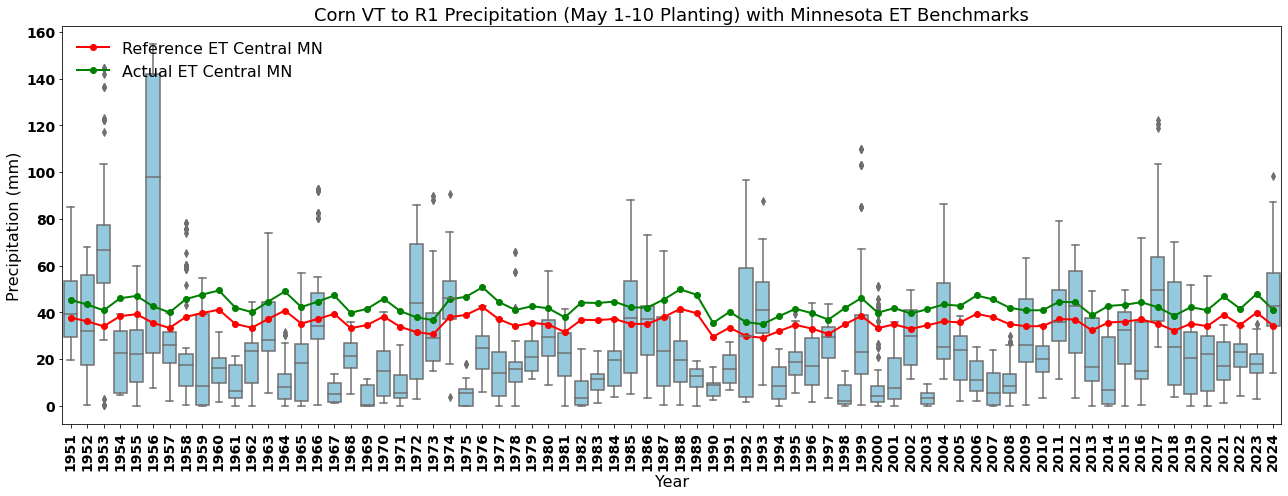

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# --- Load ET data ---
et_df = pd.read_csv("HS ET data/Cumulative_ET_July21_27_1951_2024.csv")

# Ensure years are sorted consistently
years = sorted(precip_df_plantingwindow["Year"].unique())

# Create mapping Year → ET values
ref_map = dict(zip(et_df["Year"], et_df["RefET_corn_VT-R1"]))
act_map = dict(zip(et_df["Year"], et_df["ActET_corn_VT-R1"]))

# Build y series aligned to years
y_ref = [ref_map.get(y, np.nan) for y in years]
y_act = [act_map.get(y, np.nan) for y in years]

# x positions corresponding to categorical years
xpos = np.arange(len(years))

# --- Plot ---
plt.figure(figsize=(18, 7))

# Precipitation boxplot
sns.boxplot(
    data=precip_df_plantingwindow,
    x="Year",
    y="Precipitation (mm)",
    color="skyblue",
    order=years
)

# Overlay Reference ET (red line)
plt.plot(xpos, y_ref, color="red", marker="o", linewidth=2, label="Reference ET Central MN")

# Overlay Actual ET (green line)
plt.plot(xpos, y_act, color="green", marker="o", linewidth=2, label="Actual ET Central MN")

# Customize axes/titles
plt.title("Corn VT to R1 Precipitation (May 1-10 Planting) with Minnesota ET Benchmarks", fontsize=18)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Precipitation (mm)", fontsize=16)

plt.xticks(ticks=xpos, labels=years, rotation=90, fontsize=14, fontweight="bold")
plt.yticks(fontsize=14, fontweight="bold")

plt.legend(loc="upper left", fontsize=16, frameon=False)
# Save at 300 dpi for publication
plt.tight_layout()
plt.savefig(
    "Corn_Simulated AllCounties_GDD_1951_2024/HS_VT-R1_precip_boxplot_Minnesota.png",
    dpi=300, bbox_inches='tight'
)
plt.show()

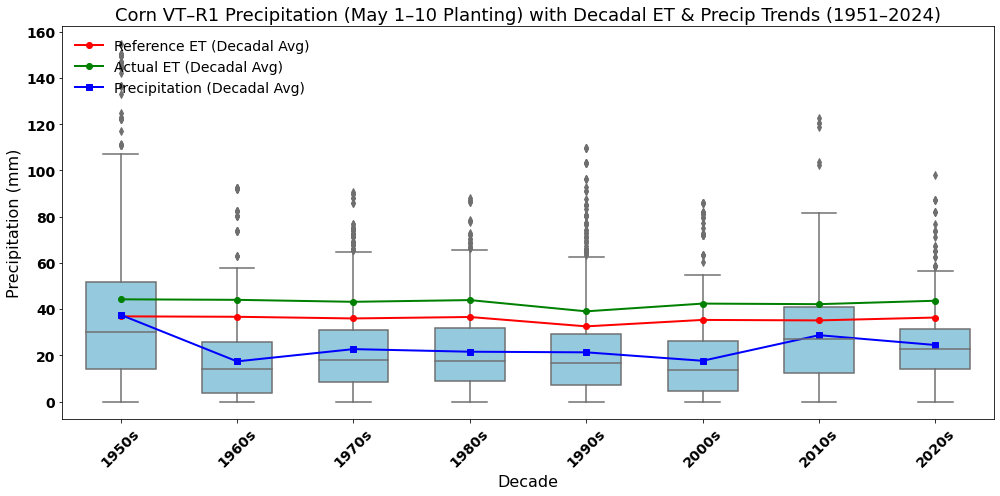

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# --- Load ET data ---
et_df = pd.read_csv("HS ET data/Cumulative_ET_July21_27_1951_2024.csv")

# --- Make Decade column ---
precip_df_plantingwindow["Decade"] = (precip_df_plantingwindow["Year"] // 10) * 10
et_df["Decade"] = (et_df["Year"] // 10) * 10

# --- Keep full distribution for boxplot ---
precip_decadal = precip_df_plantingwindow.copy()

# --- Aggregate ET by decade (mean) ---
et_decadal = et_df.groupby("Decade", as_index=False).agg({
    "RefET_corn_VT-R1": "mean",
    "ActET_corn_VT-R1": "mean"
})

# --- Aggregate precipitation by decade (mean) ---
precip_mean = (
    precip_decadal.groupby("Decade", as_index=False)["Precipitation (mm)"]
    .mean()
    .rename(columns={"Precipitation (mm)": "Precip_mean"})
)

# --- Sorted decade labels ---
decades = sorted(precip_decadal["Decade"].unique())
xpos = np.arange(len(decades))

# --- Reindex precip mean to match order ---
precip_mean = precip_mean.set_index("Decade").reindex(decades).reset_index()

# --- Plot ---
plt.figure(figsize=(14, 7))

# Precipitation boxplot (by decade)
sns.boxplot(
    data=precip_decadal,
    x="Decade",
    y="Precipitation (mm)",
    color="skyblue",
    order=decades,
    width=0.6
)

# Overlay Reference ET (red line)
plt.plot(
    xpos,
    et_decadal["RefET_corn_VT-R1"],
    color="red", marker="o", linewidth=2, label="Reference ET (Decadal Avg)"
)

# Overlay Actual ET (green line)
plt.plot(
    xpos,
    et_decadal["ActET_corn_VT-R1"],
    color="green", marker="o", linewidth=2, label="Actual ET (Decadal Avg)"
)

# Overlay Precipitation mean (blue dashed line with square markers)
plt.plot(
    xpos,
    precip_mean["Precip_mean"],
    color="blue", marker="s", linewidth=2, 
    label="Precipitation (Decadal Avg)"
)

# Customize axes/titles
plt.title("Corn VT–R1 Precipitation (May 1–10 Planting) with Decadal ET & Precip Trends (1951–2024)", fontsize=18)
plt.xlabel("Decade", fontsize=16)
plt.ylabel("Precipitation (mm)", fontsize=16)

plt.xticks(ticks=xpos, labels=[f"{d}s" for d in decades], rotation=45, fontsize=14, fontweight="bold")
plt.yticks(fontsize=14, fontweight="bold")

plt.legend(loc="upper left", fontsize=14, frameon=False)

# Save at 300 dpi for publication
plt.tight_layout()
plt.savefig(
    "Corn_Simulated AllCounties_GDD_1951_2024/HS_VT-R1_precip_boxplot_decadal_with_avg_Minnesota.png",
    dpi=300, bbox_inches='tight'
)
plt.show()


In [33]:
import pandas as pd

# --- Add Decade column ---
et_df["Decade"] = (et_df["Year"] // 10) * 10
precip_df_plantingwindow["Decade"] = (precip_df_plantingwindow["Year"] // 10) * 10

# --- ET decadal stats (mean + median) ---
et_decadal = (
    et_df.groupby("Decade", as_index=False)
         .agg({
             "RefET_corn_VT-R1": ["mean", "median"],
             "ActET_corn_VT-R1": ["mean", "median"]
         })
)
et_decadal.columns = ["Decade", "RefET_mean", "RefET_median", "ActET_mean", "ActET_median"]

# --- Precip decadal stats (mean + median) ---
precip_decadal = (
    precip_df_plantingwindow.groupby("Decade", as_index=False)
         .agg({"Precipitation (mm)": ["mean", "median"]})
)
precip_decadal.columns = ["Decade", "Precip_mean", "Precip_median"]

# --- Merge ---
decadal_table = pd.merge(et_decadal, precip_decadal, on="Decade")

# --- Build DecadeRange ---
def make_range(d, last_year=2024):
    if d == 2020:   # special handling for last partial bin
        return f"2021-{last_year}"
    else:
        return f"{d+1}-{d+10}"

decadal_table["Year"] = decadal_table["Decade"].apply(make_range)

# --- Reorder columns for readability ---
decadal_table = decadal_table[[
    "Year", "RefET_mean", "RefET_median",
    "ActET_mean", "ActET_median",
    "Precip_mean", "Precip_median"
]]

# Round values
decadal_table = decadal_table.round(2)

# --- Display ---
print(decadal_table.to_string(index=False))

# --- Save ---
decadal_table.to_csv("Corn_VT-R1Decadal_ET_Precip_Mean_Median.csv", index=False)


     Year  RefET_mean  RefET_median  ActET_mean  ActET_median  Precip_mean  Precip_median
1951-1960       36.87         37.71       44.24         45.25        37.53          30.14
1961-1970       36.68         36.17       44.02         43.41        17.38          13.95
1971-1980       35.97         36.25       43.16         43.50        22.69          17.92
1981-1990       36.59         36.72       43.91         44.07        21.56          17.33
1991-2000       32.54         32.45       39.04         38.94        21.30          16.53
2001-2010       35.33         34.86       42.39         41.84        17.64          13.62
2011-2020       35.12         35.38       42.15         42.46        28.72          27.23
2021-2024       36.36         34.58       43.63         41.50        24.46          22.84
